#Introduction
This notebook was written in Google Colab and you will need to log in with your Google account in order to download the pre-trained model for the evaluation.

---

*Note 1*: To save the user from the hassle of uploading files, a GitHub repository will be downloaded. Make sure you are always within the `content/ILSVRCPlus` directory.

You can always check your current working directory by using the magic: `%pwd`

---

*Note 2*: If you are impatient and you don't want to train the model, skip to Section 5 to download the pre-trained model from Google Drive and evaluate it.

Make sure you downloaded the dataset first, from Section 2.

In [0]:
%pwd

'/content/ILSVRCPlus'


##1. Clone the repository
First of all, let's clone my repository, that contains the implementations of the models and jump in to the generated directory.

In [0]:
!git clone https://github.com/kaseris/ILSVRCPlus.git
%cd ILSVRCPlus

Cloning into 'ILSVRCPlus'...
remote: Enumerating objects: 267, done.
remote: Counting objects: 100% (267/267), done.
remote: Compressing objects: 100% (193/193), done.
remote: Total 267 (delta 143), reused 181 (delta 68), pack-reused 0
Receiving objects: 100% (267/267), 24.88 MiB | 18.64 MiB/s, done.
Resolving deltas: 100% (143/143), done.
/content/ILSVRCPlus


##2. Download the MNIST dataset
We download the MNIST dataset and we show some of its samples. The VGG model will be trained on this dataset.

Using TensorFlow backend.


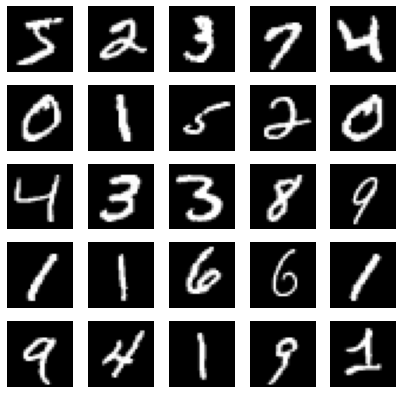

In [0]:
import keras
from keras.datasets import mnist
import matplotlib.pyplot as plt
(trainX, trainY), (testX, testY) = mnist.load_data()
fig, ax = plt.subplots(5, 5, figsize=(7,7))
for i in range(0, 5):
  for j in range(0, 5):
    ax[i][j].axis('off')
    ax[i][j].imshow(trainX[i + 5 * j, :, :], cmap='gray')

##3. Train the model
In this cell, we import and instantiate a VGG architecture and train on the MNIST dataset. You can skip this step and download the pretrained model from the Google Drive folder:

https://drive.google.com/drive/folders/16AeENomjhIT1C3vmw1fc85xP2SSlZe5z?usp=sharing

In [0]:
import VGGNetMNIST
vgg = VGGNetMNIST.VGGNetMNIST()

maxepochs=15
history = vgg.train(epochs=maxepochs, learning_rate=0.01)

[INFO]: Downloading the dataset
[INFO]: Compiling model
[INFO]: Training model
Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 48s 794us/step - loss: 3.5972 - accuracy: 0.8235 - val_loss: 2.6215 - val_accuracy: 0.9847
Epoch 2/15
60000/60000 [==============================] - 40s 675us/step - loss: 2.2183 - accuracy: 0.9822 - val_loss: 1.8329 - val_accuracy: 0.9874
Epoch 3/15
60000/60000 [==============================] - 41s 677us/step - loss: 1.5502 - accuracy: 0.9865 - val_loss: 1.2995 - val_accuracy: 0.9859
Epoch 4/15
60000/60000 [==============================] - 40s 673us/step - loss: 1.0937 - accuracy: 0.9891 - val_loss: 0.9215 - val_accuracy: 0.9883
Epoch 5/15
60000/60000 [==============================] - 41s 681us/step - loss: 0.7787 - accuracy: 0.9906 - val_loss: 0.6687 - val_accuracy: 0.9861
Epoch 6/15
60000/60000 [==============================] - 41s 677us/step - loss: 0.5647 - accuracy: 0.9898 - val_loss: 0.4832 

##4. Plot the learning curves


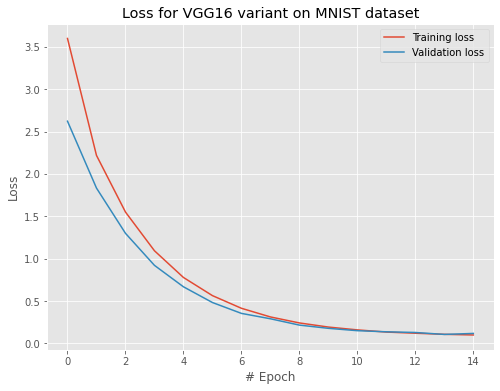

In [0]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

plt.figure(figsize=(8,6))
plt.plot(range(maxepochs), history.history['loss'], label='Training loss')
plt.plot(range(maxepochs), history.history['val_loss'], label='Validation loss')
plt.xlabel('# Epoch')
plt.ylabel('Loss')
plt.title('Loss for VGG16 variant on MNIST dataset')
plt.legend()
plt.show()

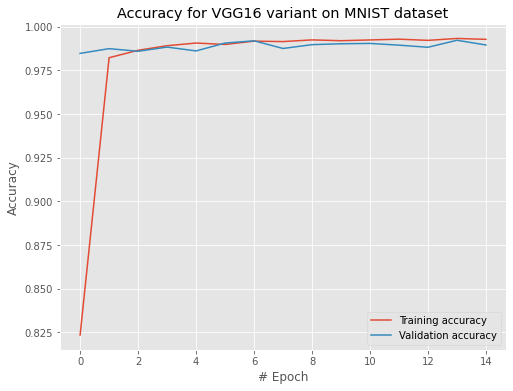

In [0]:
plt.figure(figsize=(8,6))
plt.plot(range(maxepochs), history.history['accuracy'], label='Training accuracy')
plt.plot(range(maxepochs), history.history['val_accuracy'], label='Validation accuracy')
plt.xlabel('# Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy for VGG16 variant on MNIST dataset')
plt.legend()
plt.show()

##5. Evaluate the trained model
You will be asked to log in with you Google account credentials to get the verification code. The verification code will look like this:

Use Chrome if the image does not appear.

<figure>
<center>
<img src="https://drive.google.com/uc?id=1o8yYGesQA6qc9vL8zFr4nz_AuLDe8LFn" width="400">
</figure>

Copy your code and paste it to the prompt that will pop out after executing the cell below.

In [0]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

file_id = "1OxFIIgodCEae8sYRLJjURdiydG1CtKPd" # The saved model for the MNIST VGG
downloaded = drive.CreateFile({'id':file_id})
filename = 'MNISTVGGNet-weights-improvement-14-0.99.hdf5'
downloaded.GetContentFile(filename)

In [0]:
from keras.utils import to_categorical
from keras.models import load_model
import numpy as np
vgg_mnist = load_model(filename)

try:
  testX = testX.astype(np.float32)
  testX = testX / 255.0
  testX = np.expand_dims(testX, axis=-1)
  testY = to_categorical(testY, 10)
except NameError:
  print("The variable is not defined. Make sure you downloaded the dataset at the second cell.")

In [0]:
val_loss, val_accuracy = vgg_mnist.evaluate(testX, testY)
print("Validation loss: {:.3f}\
      Validation accuracy: {:.3f}".format(val_loss, val_accuracy))

10000/10000 [==============================] - 2s 200us/step
Validation loss: 0.107      Validation accuracy: 0.992
